# Exploring Vars and Clustering Data 

## Loading data 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# save as csv
path = "../data/processed/"

paris_listing_clean_new = pd.read_csv(path + "paris_listing_clean_new", index_col=0)

## Exploring Categorical Features

In [4]:
cat_cols = paris_listing_clean_new.select_dtypes(include = ['object']).columns
print(cat_cols)

Index(['host_location', 'host_response_time', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'city', 'property_type', 'room_type', 'instant_bookable'],
      dtype='object')


#### Checking value counts for each categorical feature

In [5]:
# Output the unique values for each categorical column
for col in cat_cols:
    values = paris_listing_clean_new[col].value_counts()
    print(values, "\n")

Paris, Ile-de-France, France                      4242
FR                                                 610
France                                              30
Neuilly-sur-Seine, Ile-de-France, France            11
Jossigny, Ile-de-France, France                      9
                                                  ... 
Rosny-sous-Bois, Ile-de-France, France               1
Villars, Provence-Alpes-CÃÂ´te d'Azur, France       1
Granville, Normandy, France                          1
Toulouse, Occitanie, France                          1
Saint-Jean-de-Fos, Occitanie, France                 1
Name: host_location, Length: 257, dtype: int64 

within an hour        2819
within a day          1002
within a few hours     951
a few days or more     548
Name: host_response_time, dtype: int64 

f    3865
t    1455
Name: host_is_superhost, dtype: int64 

t    5315
f       5
Name: host_has_profile_pic, dtype: int64 

t    4666
f     654
Name: host_identity_verified, dtype: int64 

Popincour

In [6]:
# Create bar plots
cat_cols = list(cat_cols)
cat_cols = [
 'host_response_time',
 'host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'property_type',
 'room_type',
 'instant_bookable']


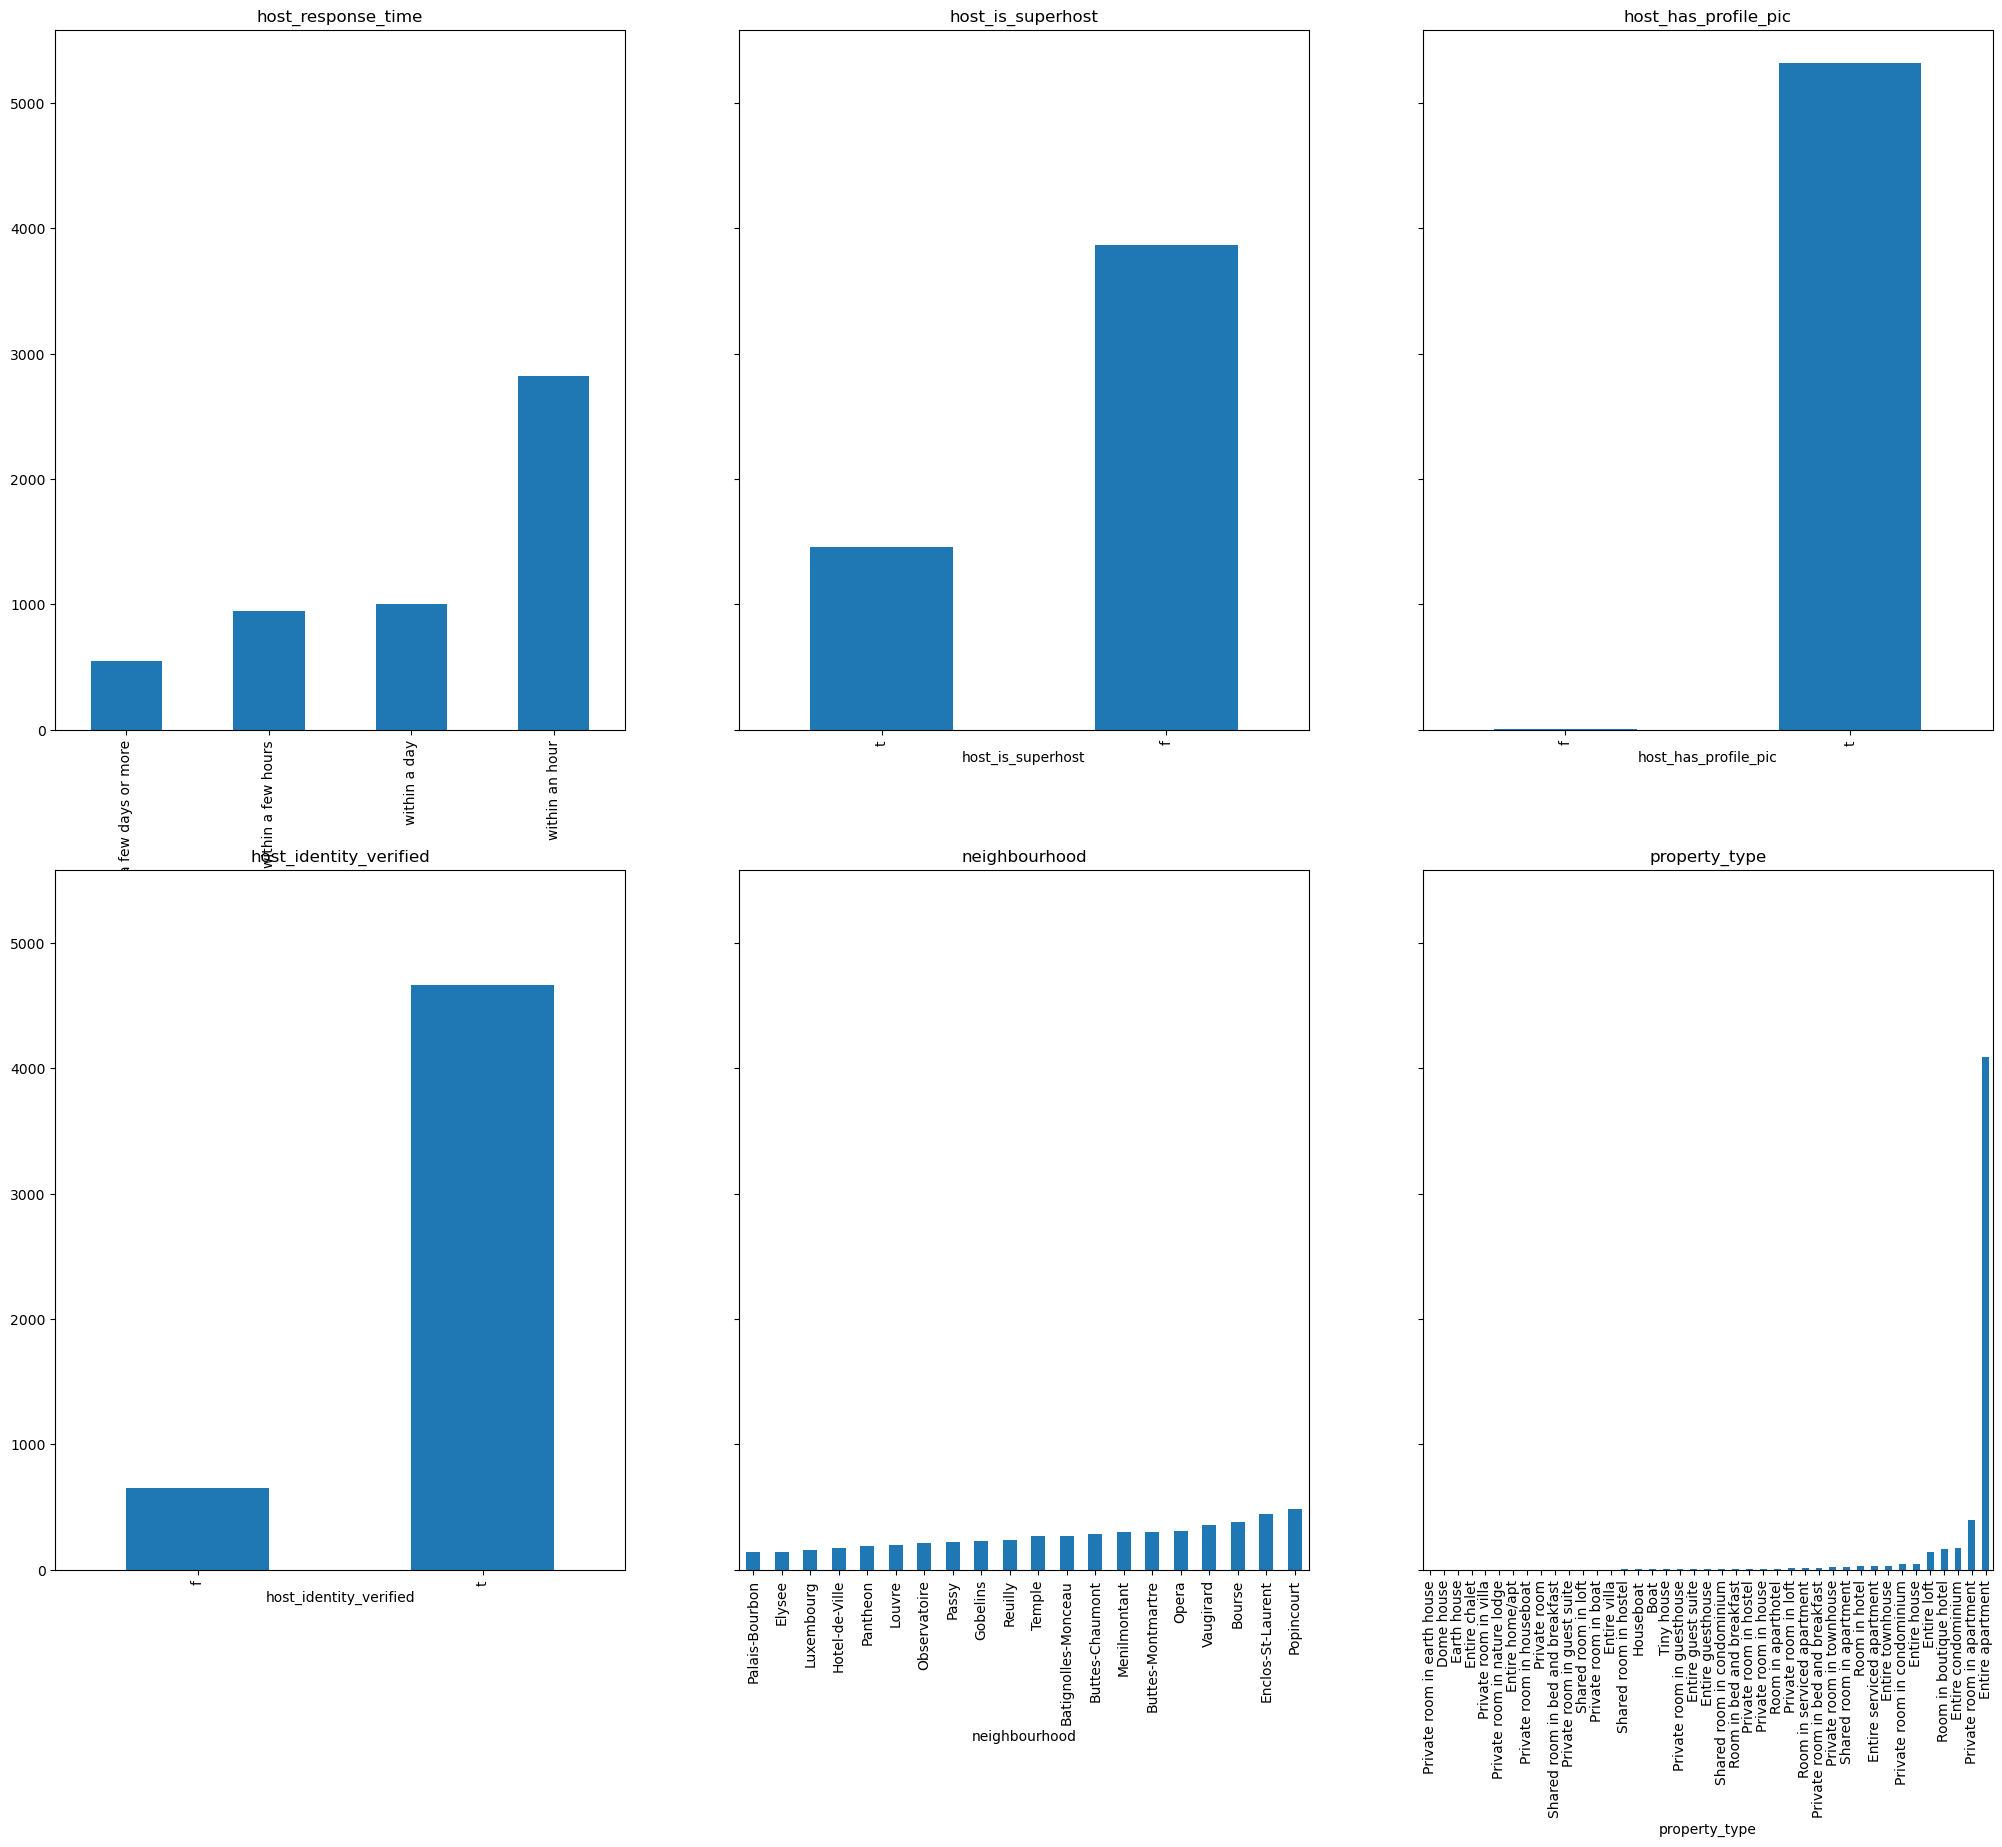

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25,20), sharey=True)


for col, ax in zip(cat_cols, axes.flatten()):
    (paris_listing_clean_new.groupby(col)        # group values together by column of interest
         .count()['price']    # take the mean of the nightly_price for each group
         .sort_values()              # sort the groups in ascending order
         .plot
         .bar(ax=ax))                # create a bar graph on the ax
    
    ax.set_title(col)                # Make the title the name of the column
    

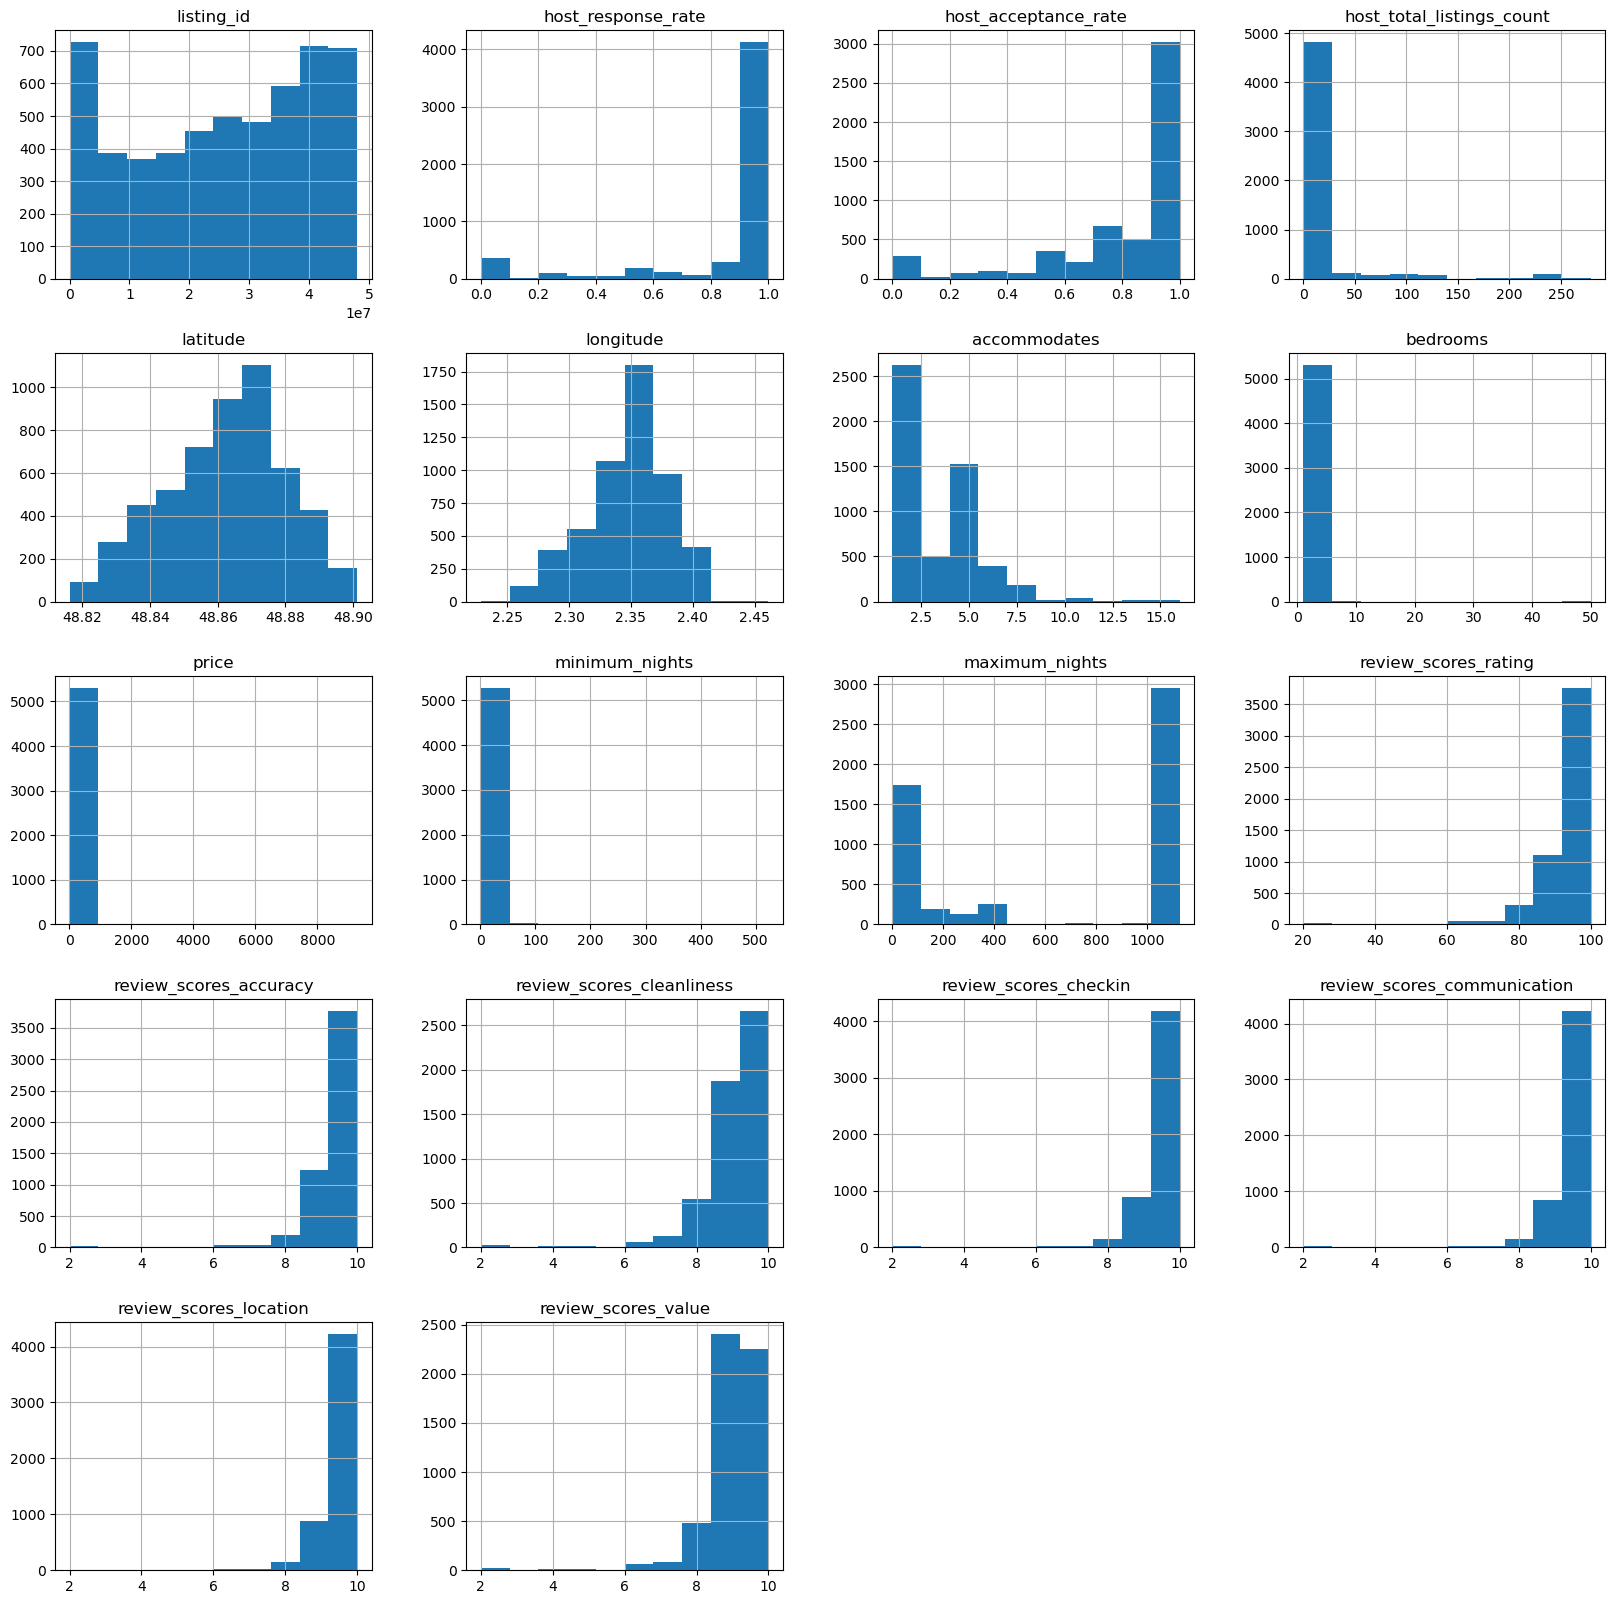

In [8]:
paris_listing_clean_new.hist(figsize = (20,20))
plt.show()

Most numerical features have a long right tail (ie. right-skewed) and are not normally distributed. For example, the number of bedrooms is expected to have a long right tail as most people would likely want to find listings with less than 2 bedrooms.


### Correlations Between Features


In [9]:
paris_listing_clean_new['host_is_superhost'] = paris_listing_clean_new['host_is_superhost'].map({'t': 1, 'f': 0})
paris_listing_clean_new['host_has_profile_pic'] = paris_listing_clean_new['host_has_profile_pic'].map({'t': 1, 'f': 0})
paris_listing_clean_new['host_identity_verified'] = paris_listing_clean_new['host_identity_verified'].map({'t': 1, 'f': 0})
paris_listing_clean_new['instant_bookable'] = paris_listing_clean_new['instant_bookable'].map({'t': 1, 'f': 0})

In [10]:
# Compute the correlation matrix
corr = paris_listing_clean_new.corr(method='pearson')
print(type(corr))
corr_df = corr.style.background_gradient(cmap='coolwarm').set_precision(2)
corr_df 

<class 'pandas.core.frame.DataFrame'>


C:\Users\Faical\AppData\Local\Temp\ipykernel_23016\2268194989.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = paris_listing_clean_new.corr(method='pearson')
C:\Users\Faical\AppData\Local\Temp\ipykernel_23016\2268194989.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_df = corr.style.background_gradient(cmap='coolwarm').set_precision(2)


## Preprocessing Features
Categorical features


In [11]:
for cat in cat_cols:
    print(cat)
    print()
    print(paris_listing_clean_new[cat].unique())

host_response_time

['within an hour' 'within a day' 'within a few hours' 'a few days or more']
host_is_superhost

[1 0]
host_has_profile_pic

[1 0]
host_identity_verified

[1 0]
neighbourhood

['Hotel-de-Ville' 'Luxembourg' 'Elysee' 'Buttes-Montmartre'
 'Enclos-St-Laurent' 'Vaugirard' 'Popincourt' 'Gobelins' 'Temple'
 'Menilmontant' 'Palais-Bourbon' 'Louvre' 'Bourse' 'Passy' 'Observatoire'
 'Pantheon' 'Opera' 'Buttes-Chaumont' 'Batignolles-Monceau' 'Reuilly']
property_type

['Entire apartment' 'Entire condominium' 'Entire house' 'Entire loft'
 'Room in serviced apartment' 'Entire serviced apartment'
 'Entire townhouse' 'Private room in apartment'
 'Private room in bed and breakfast' 'Room in boutique hotel' 'Houseboat'
 'Private room in condominium' 'Entire guest suite' 'Boat'
 'Room in bed and breakfast' 'Room in hotel' 'Private room in villa'
 'Private room in loft' 'Private room in guesthouse'
 'Private room in boat' 'Private room in townhouse'
 'Private room in house' 'Tiny house'

### Establish order of ordinal columns


In [12]:
# convert to categorical dtype
paris_listing_clean_new['host_response_time'] = paris_listing_clean_new['host_response_time'].astype('category')

In [13]:
# define order of the ordinal features
response_time_list = ['a few days or more', 'within a day', 'within a few hours', 'within an hour']

ordinal_cols = paris_listing_clean_new.select_dtypes(['category']).columns
print(ordinal_cols)

Index(['host_response_time'], dtype='object')


In [14]:
# define nominal and ordinal features in the categorical columns
nom_cols = paris_listing_clean_new.select_dtypes(['object']).columns
print(nom_cols)

ordinal_cols = paris_listing_clean_new.select_dtypes(['category']).columns
print(ordinal_cols)


Index(['host_location', 'neighbourhood', 'city', 'property_type', 'room_type'], dtype='object')
Index(['host_response_time'], dtype='object')


## Building Pipeline


In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from pickle import dump, load

In [16]:

# define numeric transformation pipeline that scales the numbers
numeric_pipeline = Pipeline([('numnorm', StandardScaler())]) 

# define an ordinal transformation pipeline that ordinal encodes the cats
ordinal_pipeline = Pipeline([('ordinalenc', OrdinalEncoder(categories = [response_time_list]))])

# define a nominal transformation pipeline that OHE the cats
nominal_pipeline = Pipeline([('onehotenc', OneHotEncoder(categories= "auto", 
                                                        sparse = False, 
                                                        handle_unknown = 'ignore'))]) 

Def new dataset to be preprocessed


In [17]:
paris_listing_transformed = paris_listing_clean_new.drop(columns = ['listing_id', 'latitude', 'longitude'])
paris_listing_transformed = paris_listing_transformed.reset_index(drop = 'index')
paris_listing_transformed.head()


host_location host_response_time  \
0         Val-de-Marne, Ile-de-France, France     within an hour   
1                                          FR     within an hour   
2                                          FR     within an hour   
3                                          FR       within a day   
4  Champigny-sur-Marne, Ile-de-France, France     within an hour   

   host_response_rate  host_acceptance_rate  host_is_superhost  \
0                 1.0                   1.0                  1   
1                 1.0                   1.0                  0   
2                 1.0                   1.0                  0   
3                 1.0                   1.0                  0   
4                 1.0                   1.0                  0   

   host_total_listings_count  host_has_profile_pic  host_identity_verified  \
0                        1.0                     1                       1   
1                        1.0                     1                       1   
2                        1.0                     1                       1   
3                        1.0                     1                       0   
4                        1.0                     1                       1   

       neighbourhood   city  ... minimum_nights maximum_nights  \
0     Hotel-de-Ville  Paris  ...              2           1125   
1         Luxembourg  Paris  ...             30           1125   
2             Elysee  Paris  ...              1           1125   
3  Buttes-Montmartre  Paris  ...              1           1125   
4  Enclos-St-Laurent  Paris  ...              2           1125   

   review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0                  95.0                    10.0                       10.0   
1                  92.0                    10.0                       10.0   
2                  84.0                     9.0                        8.0   
3                  90.0                     9.0                       10.0   
4                  85.0                     9.0                        9.0   

   review_scores_checkin  review_scores_communication  review_scores_location  \
0                   10.0                          9.0                    10.0   
1                   10.0                          9.0                    10.0   
2                    9.0                          9.0                    10.0   
3                   10.0                          9.0                    10.0   
4                    9.0                          9.0                     9.0   

   review_scores_value  instant_bookable  
0                 10.0                 1  
1                  9.0                 0  
2                  8.0                 1  
3                  9.0                 0  
4                  9.0                 1  

[5 rows x 25 columns]

In [18]:
print(paris_listing_transformed['neighbourhood'].unique())

['Hotel-de-Ville' 'Luxembourg' 'Elysee' 'Buttes-Montmartre'
 'Enclos-St-Laurent' 'Vaugirard' 'Popincourt' 'Gobelins' 'Temple'
 'Menilmontant' 'Palais-Bourbon' 'Louvre' 'Bourse' 'Passy' 'Observatoire'
 'Pantheon' 'Opera' 'Buttes-Chaumont' 'Batignolles-Monceau' 'Reuilly']


In [19]:
paris_listing_transformed_v2 = paris_listing_transformed.drop(columns = ['host_location'])
#paris_listing_transformed_v2

### Dropping name col

In [20]:
# Construct ColumnTransformer for the selected columns with pipelines
ct = ColumnTransformer(
    transformers=[
        ("nominalpipe", nominal_pipeline, [
            'neighbourhood', 'city', 'property_type', 
            'room_type', 'instant_bookable'
        ]),
        ("ordinalpipe", ordinal_pipeline, [
            'host_response_time'
        ]),
        ("numericpipe", numeric_pipeline, [
            'host_response_rate', 'host_acceptance_rate', 'host_total_listings_count', 
            'accommodates', 'bedrooms', 'price', 'minimum_nights', 'maximum_nights', 
            'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
            'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
            'review_scores_value', 'host_is_superhost', 'host_has_profile_pic', 
            'host_identity_verified'
        ])
    ]
)

# Save the column transformer
dump(ct, open('../models/column_transformer.pkl', 'wb'))

### Reorder DataFrame Columns


In [21]:
# Reorder the DataFrame with nominal first, temporal second, ordinal third, and remaining numeric (including binary) last

# Nominal Columns
nominal_cols = [
    'neighbourhood', 'city', 'property_type', 
    'room_type', 'instant_bookable'
]

# Ordinal Columns
ordinal_cols = [
    'host_response_time'
]

# Numeric Columns (including binary columns)
numeric_cols = [
    'host_response_rate', 'host_acceptance_rate', 
    'host_total_listings_count', 'accommodates', 'bedrooms', 'price', 
    'minimum_nights', 'maximum_nights', 'review_scores_rating', 
    'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication',
    'review_scores_location', 'review_scores_value',
    'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified'
]

# Combine all the columns in the desired order
desired_order = nominal_cols  + ordinal_cols + numeric_cols

# Reorder the DataFrame
paris_listing_transformed = paris_listing_transformed[desired_order]

In [22]:
# save as csv
path = "../data/processed/"

paris_listing_transformed.to_csv(path + 'paris_listing_trans')

### Transforming

In [23]:
paris_listing_pp = pd.DataFrame(ct.fit_transform(paris_listing_transformed_v2))
paris_listing_pp.head()

c:\Users\Faical\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0    1    2    3    4    5    6    7    8    9   ...        77        78  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.221289  0.475233   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ... -0.124083  0.475233   
2  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ... -1.045073 -0.702336   
3  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ... -0.354330 -0.702336   
4  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ... -0.929949 -0.702336   

         79        80        81        82        83        84        85  \
0  0.715480  0.387590 -0.882971  0.401384  0.820369  1.629834  0.030671   
1  0.715480  0.387590 -0.882971  0.401384 -0.241262 -0.613560  0.030671   
2 -1.218151 -0.904376 -0.882971  0.401384 -1.302892 -0.613560  0.030671   
3  0.715480  0.387590 -0.882971  0.401384 -0.241262 -0.613560  0.030671   
4 -0.251336 -0.904376 -0.882971 -1.080477 -0.241262 -0.613560  0.030671   

         86  
0  0.374383  
1  0.374383  
2  0.374383  
3 -2.671059  
4  0.374383  

[5 rows x 87 columns]

In [24]:
nom_cols = ['neighbourhood', 'city', 'property_type', 
    'room_type', 'instant_bookable']


In [25]:
# get nominal values
nominal_features = list(nominal_pipeline.named_steps['onehotenc'].fit(paris_listing_transformed_v2[nom_cols]).get_feature_names_out())
nominal_features

c:\Users\Faical\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


['neighbourhood_Batignolles-Monceau',
 'neighbourhood_Bourse',
 'neighbourhood_Buttes-Chaumont',
 'neighbourhood_Buttes-Montmartre',
 'neighbourhood_Elysee',
 'neighbourhood_Enclos-St-Laurent',
 'neighbourhood_Gobelins',
 'neighbourhood_Hotel-de-Ville',
 'neighbourhood_Louvre',
 'neighbourhood_Luxembourg',
 'neighbourhood_Menilmontant',
 'neighbourhood_Observatoire',
 'neighbourhood_Opera',
 'neighbourhood_Palais-Bourbon',
 'neighbourhood_Pantheon',
 'neighbourhood_Passy',
 'neighbourhood_Popincourt',
 'neighbourhood_Reuilly',
 'neighbourhood_Temple',
 'neighbourhood_Vaugirard',
 'city_Paris',
 'property_type_Boat',
 'property_type_Dome house',
 'property_type_Earth house',
 'property_type_Entire apartment',
 'property_type_Entire chalet',
 'property_type_Entire condominium',
 'property_type_Entire guest suite',
 'property_type_Entire guesthouse',
 'property_type_Entire home/apt',
 'property_type_Entire house',
 'property_type_Entire loft',
 'property_type_Entire serviced apartment',
 

### Cleaning feature names


In [26]:
ordinal_list = list(ordinal_cols)
print(ordinal_list )


['host_response_time']


In [27]:
num_columns = len(paris_listing_pp.columns)
print(f"Number of columns in DataFrame: {num_columns}")
num_new_column_names = len(nominal_features + ordinal_list + numeric_cols)
print(f"Number of new column names: {num_new_column_names}")
print(f"Nominal features: {len(nominal_features)}")
print(f"Ordinal list: {len(ordinal_list)}")
print(f"Numeric columns: {len(numeric_cols)}")


Number of columns in DataFrame: 87
Number of new column names: 87
Nominal features: 68
Ordinal list: 1
Numeric columns: 18


In [28]:
paris_listing_pp.columns = nominal_features + ordinal_list + numeric_cols
paris_listing_pp.head()

neighbourhood_Batignolles-Monceau  neighbourhood_Bourse  \
0                                0.0                   0.0   
1                                0.0                   0.0   
2                                0.0                   0.0   
3                                0.0                   0.0   
4                                0.0                   0.0   

   neighbourhood_Buttes-Chaumont  neighbourhood_Buttes-Montmartre  \
0                            0.0                              0.0   
1                            0.0                              0.0   
2                            0.0                              0.0   
3                            0.0                              1.0   
4                            0.0                              0.0   

   neighbourhood_Elysee  neighbourhood_Enclos-St-Laurent  \
0                   0.0                              0.0   
1                   0.0                              0.0   
2                   1.0                              0.0   
3                   0.0                              0.0   
4                   0.0                              1.0   

   neighbourhood_Gobelins  neighbourhood_Hotel-de-Ville  neighbourhood_Louvre  \
0                     0.0                           1.0                   0.0   
1                     0.0                           0.0                   0.0   
2                     0.0                           0.0                   0.0   
3                     0.0                           0.0                   0.0   
4                     0.0                           0.0                   0.0   

   neighbourhood_Luxembourg  ...  review_scores_rating  \
0                       0.0  ...              0.221289   
1                       1.0  ...             -0.124083   
2                       0.0  ...             -1.045073   
3                       0.0  ...             -0.354330   
4                       0.0  ...             -0.929949   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                0.475233                   0.715480               0.387590   
1                0.475233                   0.715480               0.387590   
2               -0.702336                  -1.218151              -0.904376   
3               -0.702336                   0.715480               0.387590   
4               -0.702336                  -0.251336              -0.904376   

   review_scores_communication  review_scores_location  review_scores_value  \
0                    -0.882971                0.401384             0.820369   
1                    -0.882971                0.401384            -0.241262   
2                    -0.882971                0.401384            -1.302892   
3                    -0.882971                0.401384            -0.241262   
4                    -0.882971               -1.080477            -0.241262   

   host_is_superhost  host_has_profile_pic  host_identity_verified  
0           1.629834              0.030671                0.374383  
1          -0.613560              0.030671                0.374383  
2          -0.613560              0.030671                0.374383  
3          -0.613560              0.030671               -2.671059  
4          -0.613560              0.030671                0.374383  

[5 rows x 87 columns]

## Clustering

In [29]:
#!pip uninstall umap
#!pip install umap-learn

In [30]:
import umap.umap_ as umap

In [31]:
#embedding = umap.UMAP(n_neighbors=500, min_dist= .9).fit_transform(paris_listing_pp)

#np.save('../data/processed/embedding_plot.npy', embedding)
embedding = np.load('../data/processed/embedding_plot.npy')

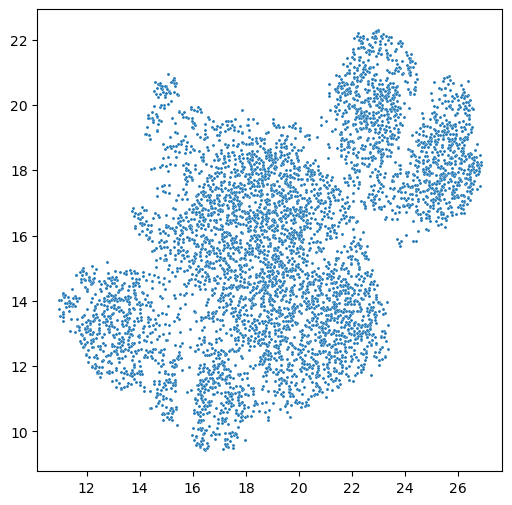

In [32]:
fig, ax = plt.subplots(figsize=(6, 6))

# Correct way to pass the x and y coordinates
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], s=5, alpha=1)
plt.show()


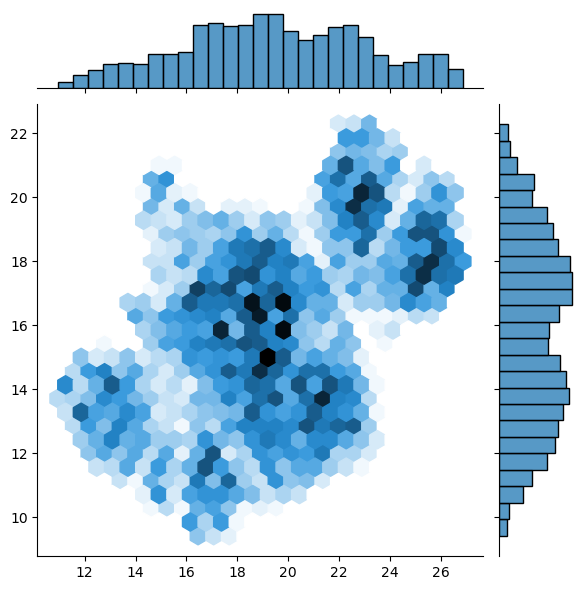

In [33]:
sns.jointplot(x=embedding[:, 0], y=embedding[:, 1], kind = 'hex', height = 6)
plt.show()

Find N° Clusters

In [34]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score


In [35]:
# # stores predicted clustering results
results=[]
kmeans_predictions = []

# # iterates for a clustering range of k = 2 to 40
for k in range(2, 41):
     kmeans = MiniBatchKMeans(n_clusters=k).fit(paris_listing_pp)
     predict = kmeans.predict(paris_listing_pp)
     result = {
         'k':k,
         'inertia': kmeans.inertia_,                      # get inertia score for each iteration of k
         'silhouette': silhouette_score(paris_listing_pp, predict),  # get silhouette score
      }
     results.append(result)
     kmeans_predictions.append(predict)
    
cluster_results = pd.DataFrame(results)

cluster_results.to_csv('../data/processed/cluster_results')

c:\Users\Faical\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Faical\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(
c:\Users\Faical\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Faical\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availa

### Elbow Score

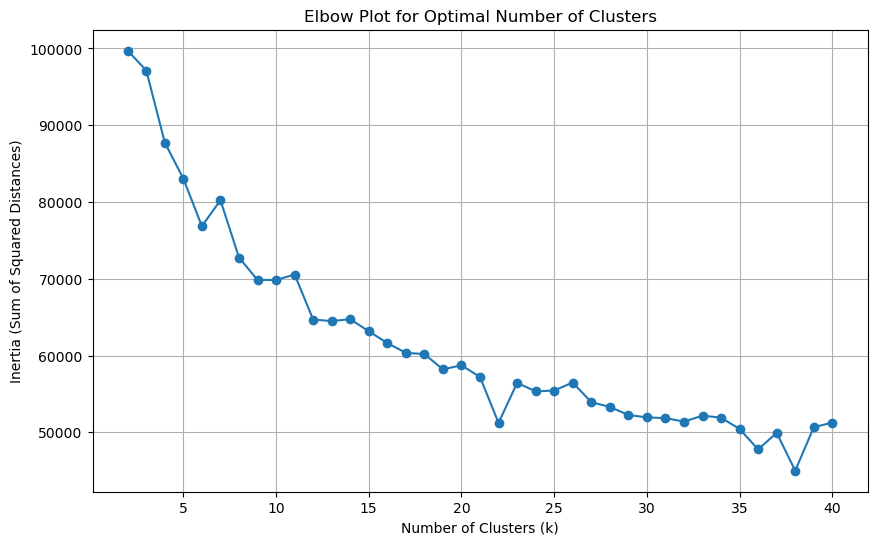

In [36]:
# Elbow Plot
plt.figure(figsize=(10, 6))
plt.plot(cluster_results['k'], cluster_results['inertia'], marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Plot for Optimal Number of Clusters')
plt.grid(True)
plt.show()

### Silohouette Score

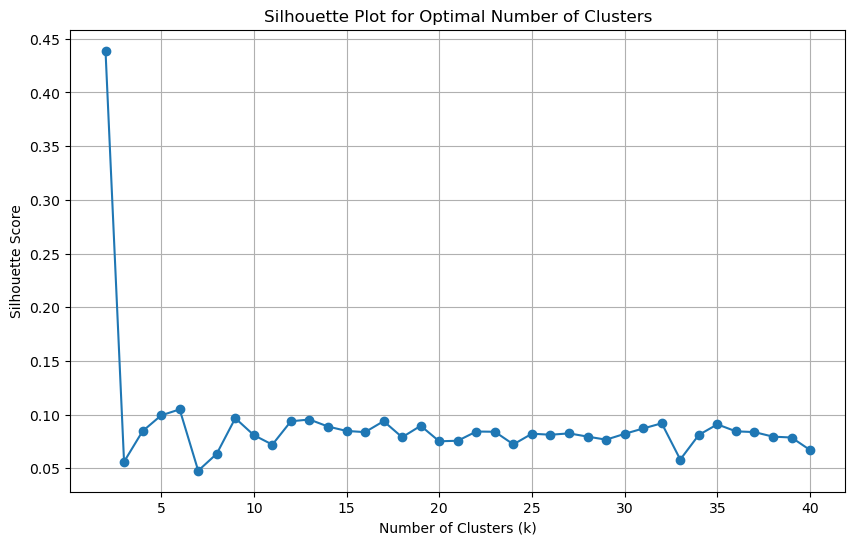

In [37]:
# Silhouette Plot
plt.figure(figsize=(10, 6))
plt.plot(cluster_results['k'], cluster_results['silhouette'], marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Plot for Optimal Number of Clusters')
plt.grid(True)
plt.show()

- We can assume from both plots that number of clusters is 8 .
- The elbow plot suggests that 5 clusters (k=5) might be a good choice as it represents a balance between minimizing inertia and keeping the model simple (i.e., not overfitting by having too many clusters).

- While the silhouette plot suggested k=2 as optimal, the elbow plot gives a different perspective by suggesting k=5. This difference indicates that while 2 clusters provide a clearer separation, 5 clusters might capture more structure in the data with a slight trade-off in clustering tightness.

In [38]:
kmeans = MiniBatchKMeans(n_clusters = 8, random_state = 42).fit(paris_listing_pp)
kmeans

c:\Users\Faical\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Faical\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


MiniBatchKMeans(random_state=42)

In [39]:
MiniBatchKMeans(n_clusters=5, random_state=42)
# labels for each cluster
pred_labels = np.unique(kmeans.predict(paris_listing_pp))
print(pred_labels)


[0 1 2 3 4 5 6 7]


In [40]:
# get prediction on sd_pp to get labels
sd_cluster_labels = pd.Series(kmeans.predict(paris_listing_pp), index = paris_listing_pp.index)

# convert predicted cluster labels to a list
cluster_list = sd_cluster_labels.values.tolist()
# insert cluster label to the sd_modeling df
paris_listings_clustered = paris_listing_clean_new.copy()
paris_listings_clustered.insert(1, 'cluster_label', cluster_list)

paris_listings_clustered.head()

listing_id  cluster_label                               host_location  \
26291     8134584              0         Val-de-Marne, Ile-de-France, France   
26292    11433504              4                                          FR   
26297    19444226              7                                          FR   
26299    25064628              3                                          FR   
26301    28022512              7  Champigny-sur-Marne, Ile-de-France, France   

      host_response_time  host_response_rate  host_acceptance_rate  \
26291     within an hour                 1.0                   1.0   
26292     within an hour                 1.0                   1.0   
26297     within an hour                 1.0                   1.0   
26299       within a day                 1.0                   1.0   
26301     within an hour                 1.0                   1.0   

       host_is_superhost  host_total_listings_count  host_has_profile_pic  \
26291                  1                        1.0                     1   
26292                  0                        1.0                     1   
26297                  0                        1.0                     1   
26299                  0                        1.0                     1   
26301                  0                        1.0                     1   

       host_identity_verified  ... minimum_nights maximum_nights  \
26291                       1  ...              2           1125   
26292                       1  ...             30           1125   
26297                       1  ...              1           1125   
26299                       0  ...              1           1125   
26301                       1  ...              2           1125   

       review_scores_rating  review_scores_accuracy review_scores_cleanliness  \
26291                  95.0                    10.0                      10.0   
26292                  92.0                    10.0                      10.0   
26297                  84.0                     9.0                       8.0   
26299                  90.0                     9.0                      10.0   
26301                  85.0                     9.0                       9.0   

      review_scores_checkin  review_scores_communication  \
26291                  10.0                          9.0   
26292                  10.0                          9.0   
26297                   9.0                          9.0   
26299                  10.0                          9.0   
26301                   9.0                          9.0   

       review_scores_location  review_scores_value  instant_bookable  
26291                    10.0                 10.0                 1  
26292                    10.0                  9.0                 0  
26297                    10.0                  8.0                 1  
26299                    10.0                  9.0                 0  
26301                     9.0                  9.0                 1  

[5 rows x 29 columns]

In [41]:
# save as csv
path = "../data/processed/"
paris_listings_clustered.to_csv(path + 'paris_listing_clustered')

In [42]:
# load as csv
path = "../data/processed/"

paris_listing_clean_new = pd.read_csv(path + "paris_listing_clustered", index_col=0)

In [43]:
# insert cluster label to the sd_modeling df
paris_listing_pp_clustered = paris_listing_pp.copy()
paris_listing_pp_clustered.insert(0, 'cluster_label', cluster_list)

paris_listing_pp_clustered.head()


cluster_label  neighbourhood_Batignolles-Monceau  neighbourhood_Bourse  \
0              0                                0.0                   0.0   
1              4                                0.0                   0.0   
2              7                                0.0                   0.0   
3              3                                0.0                   0.0   
4              7                                0.0                   0.0   

   neighbourhood_Buttes-Chaumont  neighbourhood_Buttes-Montmartre  \
0                            0.0                              0.0   
1                            0.0                              0.0   
2                            0.0                              0.0   
3                            0.0                              1.0   
4                            0.0                              0.0   

   neighbourhood_Elysee  neighbourhood_Enclos-St-Laurent  \
0                   0.0                              0.0   
1                   0.0                              0.0   
2                   1.0                              0.0   
3                   0.0                              0.0   
4                   0.0                              1.0   

   neighbourhood_Gobelins  neighbourhood_Hotel-de-Ville  neighbourhood_Louvre  \
0                     0.0                           1.0                   0.0   
1                     0.0                           0.0                   0.0   
2                     0.0                           0.0                   0.0   
3                     0.0                           0.0                   0.0   
4                     0.0                           0.0                   0.0   

   ...  review_scores_rating  review_scores_accuracy  \
0  ...              0.221289                0.475233   
1  ...             -0.124083                0.475233   
2  ...             -1.045073               -0.702336   
3  ...             -0.354330               -0.702336   
4  ...             -0.929949               -0.702336   

   review_scores_cleanliness  review_scores_checkin  \
0                   0.715480               0.387590   
1                   0.715480               0.387590   
2                  -1.218151              -0.904376   
3                   0.715480               0.387590   
4                  -0.251336              -0.904376   

   review_scores_communication  review_scores_location  review_scores_value  \
0                    -0.882971                0.401384             0.820369   
1                    -0.882971                0.401384            -0.241262   
2                    -0.882971                0.401384            -1.302892   
3                    -0.882971                0.401384            -0.241262   
4                    -0.882971               -1.080477            -0.241262   

   host_is_superhost  host_has_profile_pic  host_identity_verified  
0           1.629834              0.030671                0.374383  
1          -0.613560              0.030671                0.374383  
2          -0.613560              0.030671                0.374383  
3          -0.613560              0.030671               -2.671059  
4          -0.613560              0.030671                0.374383  

[5 rows x 88 columns]

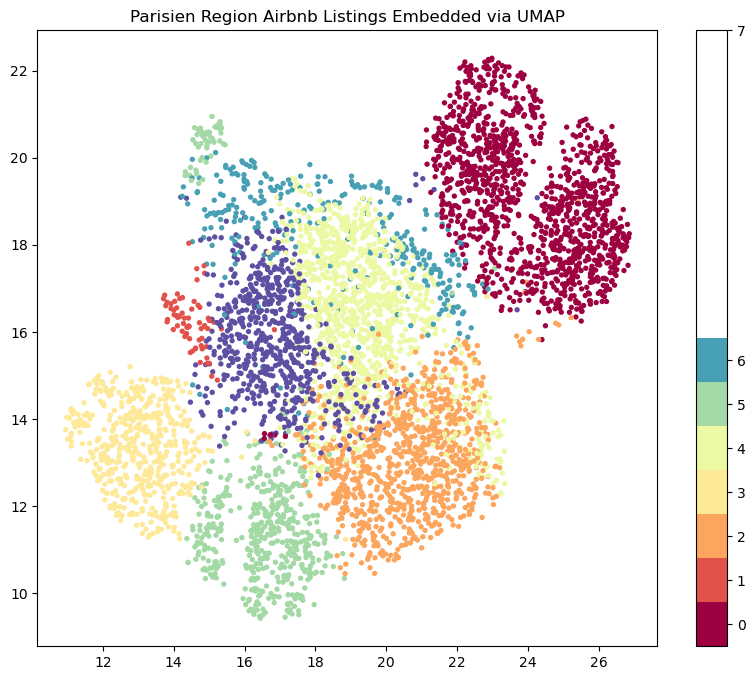

In [44]:
# plot 6 clusters with UMAP 
fig, ax = plt.subplots(figsize = (10,8))

plt.scatter(*embedding.T, s = 8, alpha = 1, c = kmeans.predict(paris_listing_pp), cmap = 'Spectral')

labels = sorted(list(sd_cluster_labels.unique())) # cluster labels

cbar = plt.colorbar(boundaries=np.arange(8)-0.5) # 6 cluster labels
cbar.set_ticks(np.arange(8))
cbar.set_ticklabels(labels)
plt.title('Parisien Region Airbnb Listings Embedded via UMAP');

plt.show()

## Understanding the Cluster Labels with Bokeh


- While we have identified 6 clustered groups/labels, it is still difficult to understand what seperates each individual group from another. I'll now construct an interactive bokeh scatterplot which will assign labels to each point and we'll try to find similarities amongst the clusters.


In [45]:
from bokeh.resources import INLINE
from bokeh.plotting import figure, show
from bokeh.transform import factor_cmap

import bokeh.io

import umap.plot

bokeh.io.output_notebook(INLINE)


c:\Users\Faical\anaconda3\Lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
c:\Users\Faical\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


Loading BokehJS ...

In [54]:
paris_listing_pp_clustered.head(2)

cluster_label  neighbourhood_Batignolles-Monceau  neighbourhood_Bourse  \
0              0                                0.0                   0.0   
1              4                                0.0                   0.0   

   neighbourhood_Buttes-Chaumont  neighbourhood_Buttes-Montmartre  \
0                            0.0                              0.0   
1                            0.0                              0.0   

   neighbourhood_Elysee  neighbourhood_Enclos-St-Laurent  \
0                   0.0                              0.0   
1                   0.0                              0.0   

   neighbourhood_Gobelins  neighbourhood_Hotel-de-Ville  neighbourhood_Louvre  \
0                     0.0                           1.0                   0.0   
1                     0.0                           0.0                   0.0   

   ...  review_scores_rating  review_scores_accuracy  \
0  ...              0.221289                0.475233   
1  ...             -0.124083                0.475233   

   review_scores_cleanliness  review_scores_checkin  \
0                    0.71548                0.38759   
1                    0.71548                0.38759   

   review_scores_communication  review_scores_location  review_scores_value  \
0                    -0.882971                0.401384             0.820369   
1                    -0.882971                0.401384            -0.241262   

   host_is_superhost  host_has_profile_pic  host_identity_verified  
0           1.629834              0.030671                0.374383  
1          -0.613560              0.030671                0.374383  

[2 rows x 88 columns]

### Reverse OHE
- In order to make the interactive bokeh plot below more interpretable, I'll need to reverse encode the sd_pp_clustered dataframe so that it assigns labels to each individual point in the plot.
   
- Thus, I'll need to format sd_pp_clustered to look like the original column format in sd_trans as shown below:

In [47]:
paris_listing_transformed_v2.head(2)

host_response_time  host_response_rate  host_acceptance_rate  \
0     within an hour                 1.0                   1.0   
1     within an hour                 1.0                   1.0   

   host_is_superhost  host_total_listings_count  host_has_profile_pic  \
0                  1                        1.0                     1   
1                  0                        1.0                     1   

   host_identity_verified   neighbourhood   city     property_type  ...  \
0                       1  Hotel-de-Ville  Paris  Entire apartment  ...   
1                       1      Luxembourg  Paris  Entire apartment  ...   

  minimum_nights  maximum_nights  review_scores_rating  \
0              2            1125                  95.0   
1             30            1125                  92.0   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                    10.0                       10.0                   10.0   
1                    10.0                       10.0                   10.0   

   review_scores_communication  review_scores_location  review_scores_value  \
0                          9.0                    10.0                 10.0   
1                          9.0                    10.0                  9.0   

   instant_bookable  
0                 1  
1                 0  

[2 rows x 24 columns]

In [48]:
paris_listing_pp_clustered.head(2)

cluster_label  neighbourhood_Batignolles-Monceau  neighbourhood_Bourse  \
0              0                                0.0                   0.0   
1              4                                0.0                   0.0   

   neighbourhood_Buttes-Chaumont  neighbourhood_Buttes-Montmartre  \
0                            0.0                              0.0   
1                            0.0                              0.0   

   neighbourhood_Elysee  neighbourhood_Enclos-St-Laurent  \
0                   0.0                              0.0   
1                   0.0                              0.0   

   neighbourhood_Gobelins  neighbourhood_Hotel-de-Ville  neighbourhood_Louvre  \
0                     0.0                           1.0                   0.0   
1                     0.0                           0.0                   0.0   

   ...  review_scores_rating  review_scores_accuracy  \
0  ...              0.221289                0.475233   
1  ...             -0.124083                0.475233   

   review_scores_cleanliness  review_scores_checkin  \
0                    0.71548                0.38759   
1                    0.71548                0.38759   

   review_scores_communication  review_scores_location  review_scores_value  \
0                    -0.882971                0.401384             0.820369   
1                    -0.882971                0.401384            -0.241262   

   host_is_superhost  host_has_profile_pic  host_identity_verified  
0           1.629834              0.030671                0.374383  
1          -0.613560              0.030671                0.374383  

[2 rows x 88 columns]

In [49]:
# assigns cluster labels
cluster_df = pd.DataFrame(paris_listing_pp_clustered['cluster_label'])
cluster_df

cluster_label
0                 0
1                 4
2                 7
3                 3
4                 7
...             ...
5315              0
5316              0
5317              4
5318              2
5319              2

[5320 rows x 1 columns]

In [50]:
# Find the first and last neighborhood columns, replace 'First_Neighborhood' and 'Last_Neighborhood' with actual names
neighborhood_columns = [col for col in paris_listing_pp_clustered.columns if 'neighbourhood_' in col]
first_neighborhood = neighborhood_columns[0] 
print(first_neighborhood)
last_neighborhood = neighborhood_columns[-1]
print(last_neighborhood)
# assigns neighborhood
neighborhood_df = pd.DataFrame(paris_listing_pp_clustered.loc[:, first_neighborhood:last_neighborhood].idxmax(axis=1)).rename(columns={0: 'Neighborhood'})


neighbourhood_Batignolles-Monceau
neighbourhood_Vaugirard


In [51]:
# Find the first and last neighborhood columns, replace 'First_Neighborhood' and 'Last_Neighborhood' with actual names
property_type_columns = [col for col in paris_listing_pp_clustered.columns if 'property_type_' in col]
first_property_type = property_type_columns[0]
print(first_property_type)
last_property_type = property_type_columns[-1]
print(last_property_type)
# assigns _property_type
property_type_df = pd.DataFrame(paris_listing_pp_clustered.loc[:, first_property_type:last_property_type].idxmax(axis=1)).rename(columns={0: 'Property_type'})


property_type_Boat
property_type_Tiny house


In [52]:
paris_listing_pp_clustered

cluster_label  neighbourhood_Batignolles-Monceau  neighbourhood_Bourse  \
0                 0                                0.0                   0.0   
1                 4                                0.0                   0.0   
2                 7                                0.0                   0.0   
3                 3                                0.0                   0.0   
4                 7                                0.0                   0.0   
...             ...                                ...                   ...   
5315              0                                0.0                   0.0   
5316              0                                0.0                   0.0   
5317              4                                0.0                   0.0   
5318              2                                0.0                   0.0   
5319              2                                0.0                   0.0   

      neighbourhood_Buttes-Chaumont  neighbourhood_Buttes-Montmartre  \
0                               0.0                              0.0   
1                               0.0                              0.0   
2                               0.0                              0.0   
3                               0.0                              1.0   
4                               0.0                              0.0   
...                             ...                              ...   
5315                            0.0                              1.0   
5316                            0.0                              0.0   
5317                            0.0                              0.0   
5318                            0.0                              0.0   
5319                            1.0                              0.0   

      neighbourhood_Elysee  neighbourhood_Enclos-St-Laurent  \
0                      0.0                              0.0   
1                      0.0                              0.0   
2                      1.0                              0.0   
3                      0.0                              0.0   
4                      0.0                              1.0   
...                    ...                              ...   
5315                   0.0                              0.0   
5316                   0.0                              0.0   
5317                   0.0                              0.0   
5318                   0.0                              0.0   
5319                   0.0                              0.0   

      neighbourhood_Gobelins  neighbourhood_Hotel-de-Ville  \
0                        0.0                           1.0   
1                        0.0                           0.0   
2                        0.0                           0.0   
3                        0.0                           0.0   
4                        0.0                           0.0   
...                      ...                           ...   
5315                     0.0                           0.0   
5316                     0.0                           0.0   
5317                     0.0                           0.0   
5318                     0.0                           0.0   
5319                     0.0                           0.0   

      neighbourhood_Louvre  ...  review_scores_rating  review_scores_accuracy  \
0                      0.0  ...              0.221289                0.475233   
1                      0.0  ...             -0.124083                0.475233   
2                      0.0  ...             -1.045073               -0.702336   
3                      0.0  ...             -0.354330               -0.702336   
4                      0.0  ...             -0.929949               -0.702336   
...                    ...  ...                   ...                     ...   
5315                   0.0  ...              0.681784                0.475233   
5316                   0.0  ..

In [56]:
# Find the first and last neighborhood columns, replace 'First_Neighborhood' and 'Last_Neighborhood' with actual names
room_type_columns = [col for col in paris_listing_pp_clustered.columns if 'room_type_' in col]
first_room_type = room_type_columns[0]
print(first_room_type)
last_room_type = room_type_columns[-1]
print(last_room_type)
# assigns _property_type
room_type_df = pd.DataFrame(paris_listing_pp_clustered.loc[:, first_room_type:last_room_type].idxmax(axis=1)).rename(columns={0: 'Room_type'})

room_type_Entire place
room_type_Shared room


In [58]:
# Find the first and last neighborhood columns, replace 'First_Neighborhood' and 'Last_Neighborhood' with actual names
price_columns = [col for col in paris_listing_pp_clustered.columns if 'price' in col]
first_price = price_columns[0]
print(first_price)
last_price = price_columns[-1]
print(last_price)
# assigns _property_type
price_df = pd.DataFrame(paris_listing_pp_clustered.loc[:, first_price:last_price].idxmax(axis=1)).rename(columns={0: 'Price'})

price
price


In [61]:
# assigns price
price = pd.DataFrame('$' + paris_listing_transformed_v2['price'].astype(str))

# assigns rating
rating = pd.DataFrame(paris_listing_transformed_v2['review_scores_rating'].astype(int))

# concat all the dfs
cluster_hover_data = pd.concat([cluster_df, price, rating, neighborhood_df, property_type_df, room_type_df], axis=1)

cluster_hover_data


cluster_label   price  review_scores_rating  \
0                 0  $180.0                    95   
1                 4  $140.0                    92   
2                 7  $165.0                    84   
3                 3   $43.0                    90   
4                 7   $29.0                    85   
...             ...     ...                   ...   
5315              0  $125.0                    99   
5316              0  $150.0                    99   
5317              4   $70.0                    98   
5318              2   $50.0                    91   
5319              2   $59.0                    98   

                         Neighborhood                   Property_type  \
0        neighbourhood_Hotel-de-Ville  property_type_Entire apartment   
1            neighbourhood_Luxembourg  property_type_Entire apartment   
2                neighbourhood_Elysee  property_type_Entire apartment   
3     neighbourhood_Buttes-Montmartre  property_type_Entire apartment   
4     neighbourhood_Enclos-St-Laurent  property_type_Entire apartment   
...                               ...                             ...   
5315  neighbourhood_Buttes-Montmartre  property_type_Entire apartment   
5316     neighbourhood_Palais-Bourbon  property_type_Entire apartment   
5317         neighbourhood_Popincourt  property_type_Entire apartment   
5318         neighbourhood_Luxembourg  property_type_Entire apartment   
5319    neighbourhood_Buttes-Chaumont  property_type_Entire apartment   

                   Room_type  
0     room_type_Entire place  
1     room_type_Entire place  
2     room_type_Entire place  
3     room_type_Entire place  
4     room_type_Entire place  
...                      ...  
5315  room_type_Entire place  
5316  room_type_Entire place  
5317  room_type_Entire place  
5318  room_type_Entire place  
5319  room_type_Entire place  

[5320 rows x 6 columns]

In [67]:
# cleaning up columns to plot 
cluster_hover_data['price'] = cluster_hover_data['price'].str.replace('$', '')
cluster_hover_data['price'] = cluster_hover_data['price'].astype(float)
cluster_hover_data['cluster_label'] = cluster_hover_data['cluster_label'].astype('category')
cluster_hover_data

C:\Users\Faical\AppData\Local\Temp\ipykernel_23016\3823843312.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cluster_hover_data['price'] = cluster_hover_data['price'].str.replace('$', '')


cluster_label  price  review_scores_rating  \
0                0  180.0                    95   
1                4  140.0                    92   
2                7  165.0                    84   
3                3   43.0                    90   
4                7   29.0                    85   
...            ...    ...                   ...   
5315             0  125.0                    99   
5316             0  150.0                    99   
5317             4   70.0                    98   
5318             2   50.0                    91   
5319             2   59.0                    98   

                         Neighborhood                   Property_type  \
0        neighbourhood_Hotel-de-Ville  property_type_Entire apartment   
1            neighbourhood_Luxembourg  property_type_Entire apartment   
2                neighbourhood_Elysee  property_type_Entire apartment   
3     neighbourhood_Buttes-Montmartre  property_type_Entire apartment   
4     neighbourhood_Enclos-St-Laurent  property_type_Entire apartment   
...                               ...                             ...   
5315  neighbourhood_Buttes-Montmartre  property_type_Entire apartment   
5316     neighbourhood_Palais-Bourbon  property_type_Entire apartment   
5317         neighbourhood_Popincourt  property_type_Entire apartment   
5318         neighbourhood_Luxembourg  property_type_Entire apartment   
5319    neighbourhood_Buttes-Chaumont  property_type_Entire apartment   

                   Room_type  
0     room_type_Entire place  
1     room_type_Entire place  
2     room_type_Entire place  
3     room_type_Entire place  
4     room_type_Entire place  
...                      ...  
5315  room_type_Entire place  
5316  room_type_Entire place  
5317  room_type_Entire place  
5318  room_type_Entire place  
5319  room_type_Entire place  

[5320 rows x 6 columns]

In [69]:
# save as csv
path = "../data/processed/"

cluster_hover_data.to_csv(path + 'cluster_hover_data')

### Distribution of Clusters
Let's first take a look at the distribution of each cluster group.



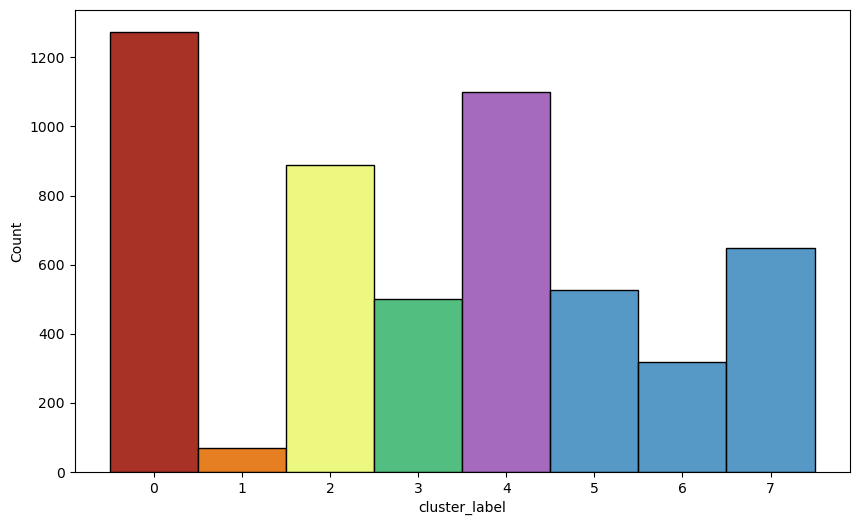

In [70]:
fig, axes = plt.subplots(figsize=(10,6))

ax = sns.histplot(cluster_hover_data['cluster_label'])

# set bar colors
ax.patches[0].set_facecolor('#A93226')
ax.patches[1].set_facecolor('#E67E22')
ax.patches[2].set_facecolor('#ECF87F')
ax.patches[3].set_facecolor('#52BE80')
ax.patches[4].set_facecolor('#A569BD')

plt.show()

In [85]:
# assigning colors to each label
palette = {0: '#A93226', 1:'#E67E22', 2:'#ECF87F', 3:'#52BE80', 4:'#A569BD', 5:'#5DADE2', 6:'#F1948A', 7:'#F8C471'}

### Room Type


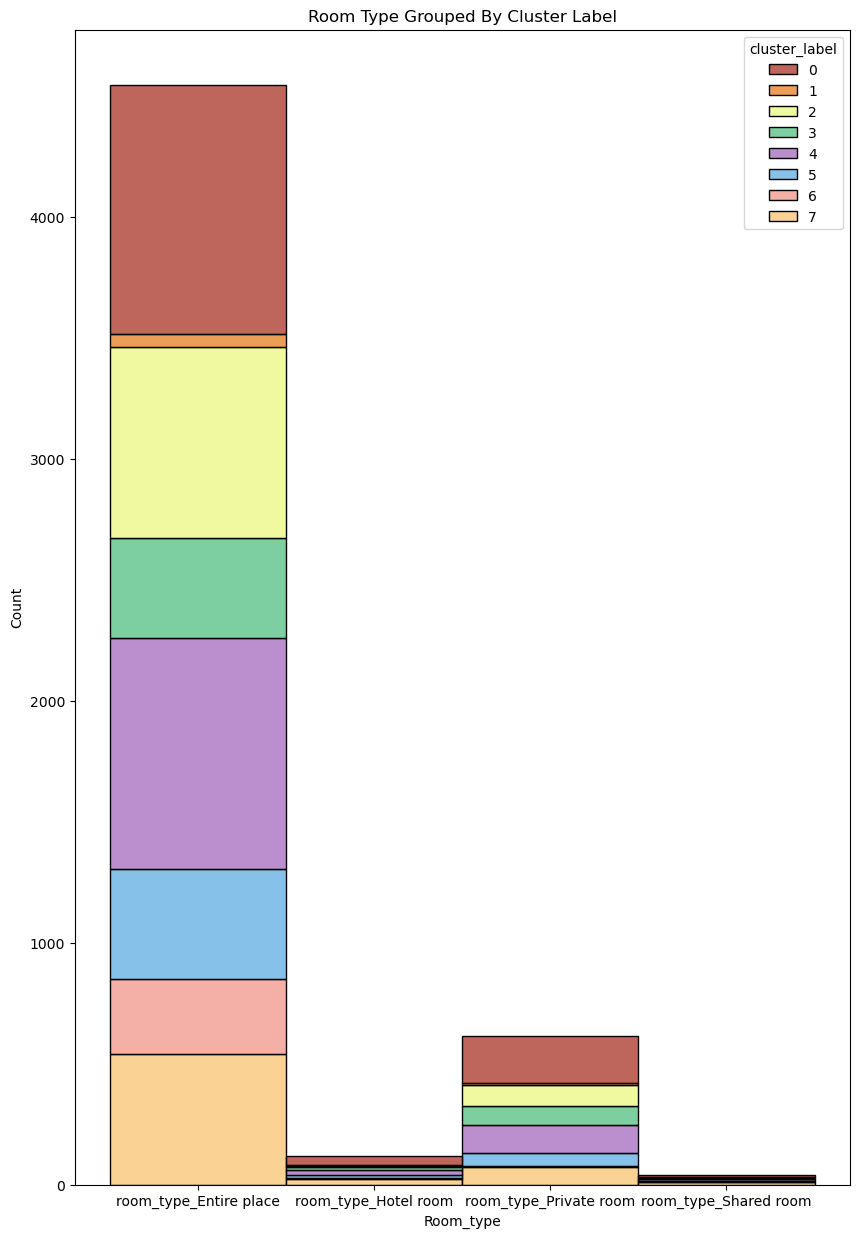

In [86]:
fig, axes = plt.subplots(figsize=(10,15))

ax = sns.histplot(data=cluster_hover_data, 
             x='Room_type', 
             hue='cluster_label', palette = palette,
             multiple="stack").set(title='Room Type Grouped By Cluster Label')

plt.show()

### Review Score Ratings
Ratings Above 70



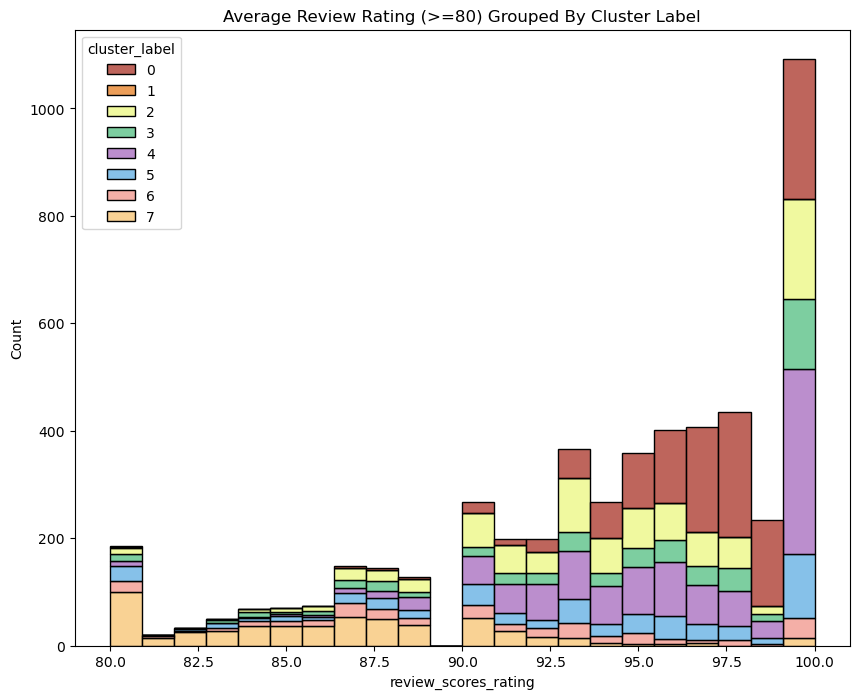

In [87]:
fig, axes = plt.subplots(figsize=(10,8))

# create a filter of greater than 70 rating to remove outliers
greater_than_80 = cluster_hover_data[cluster_hover_data['review_scores_rating'] >= 80]

ax = sns.histplot(data=greater_than_80, 
             x='review_scores_rating', 
             hue='cluster_label', palette = palette,
             multiple="stack").set(title='Average Review Rating (>=80) Grouped By Cluster Label')

plt.show()

### Property Types


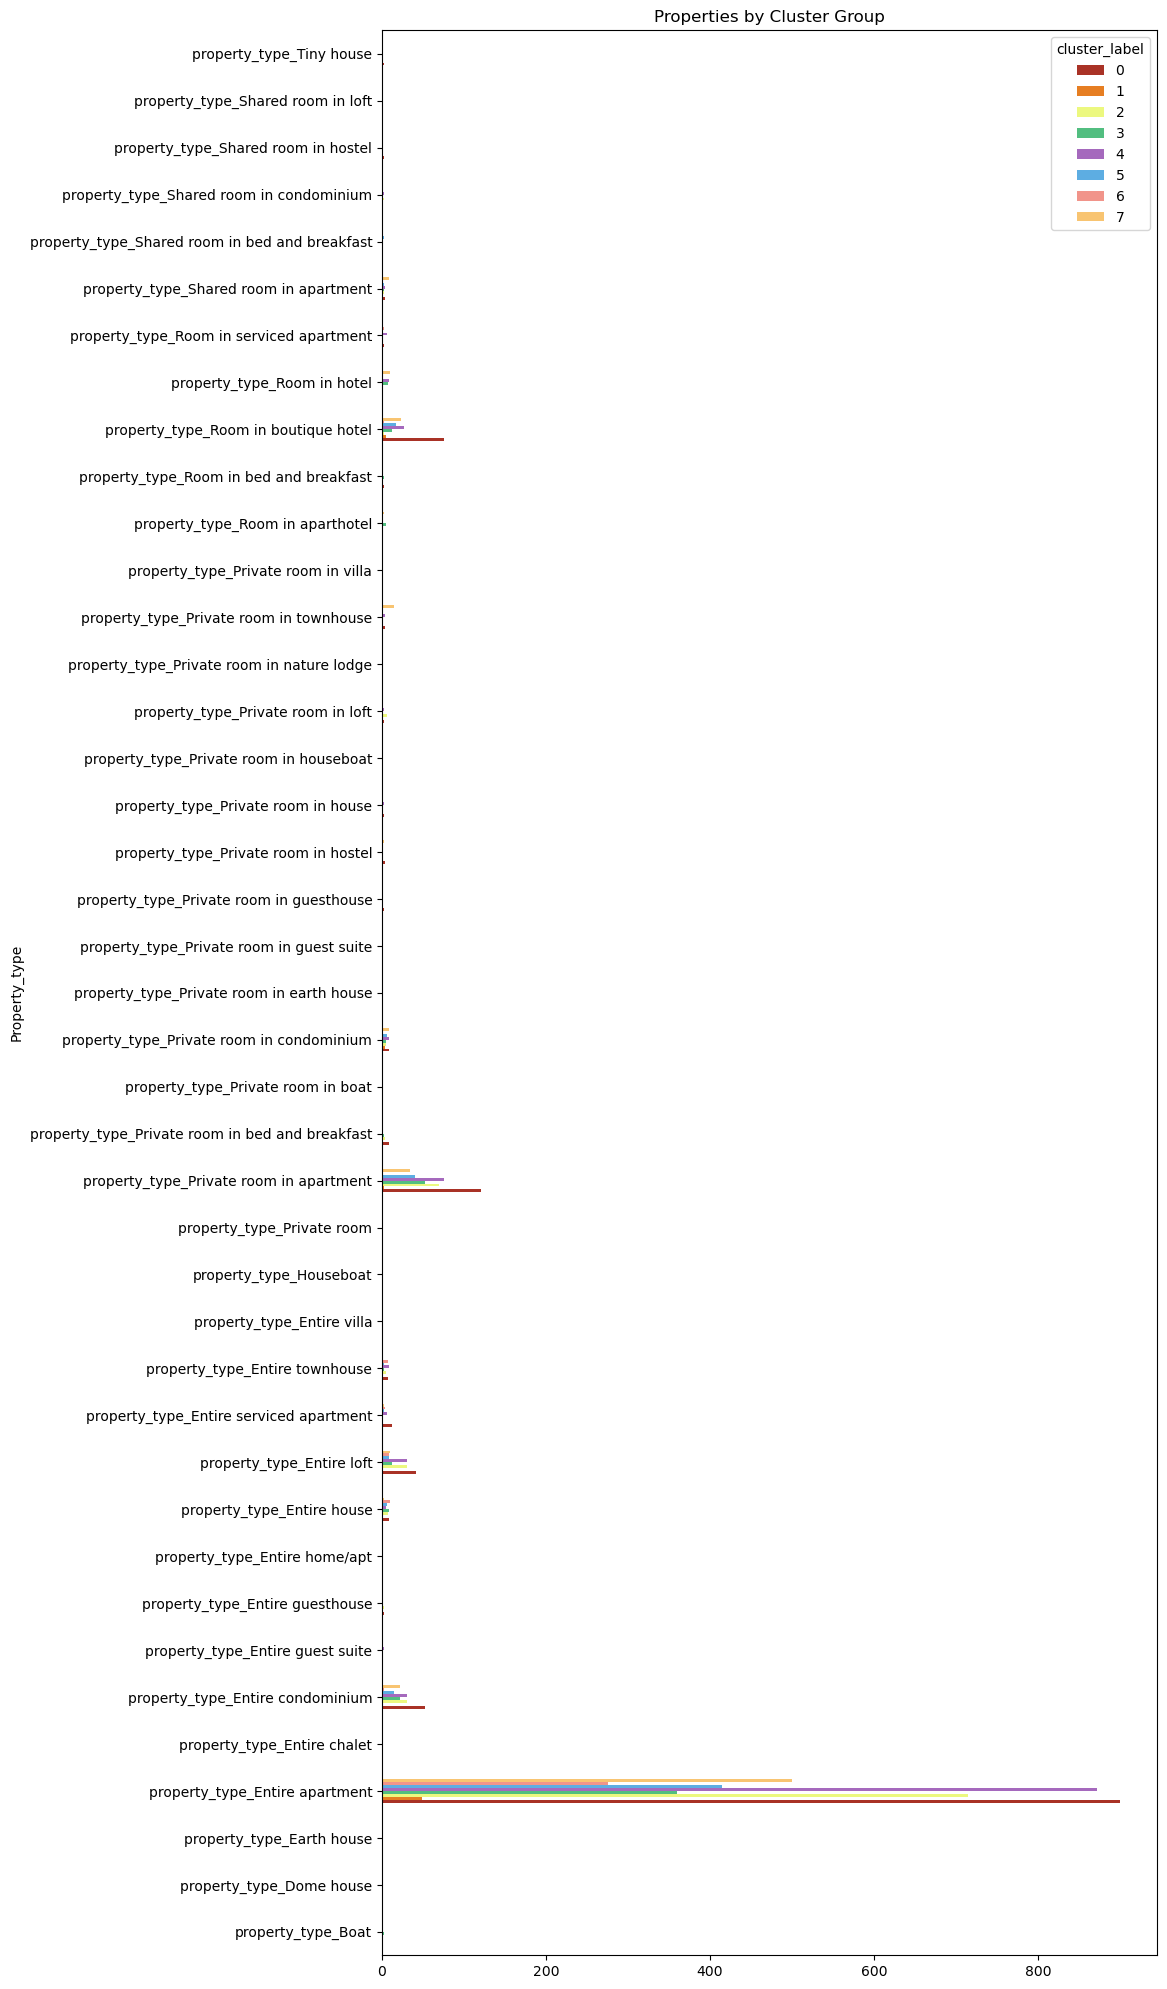

In [95]:
cluster_hover_data.groupby(['Property_type', 'cluster_label']).size().unstack(fill_value=0).plot.barh(figsize=(10,25), 
                                                                                                 color = palette)

plt.title('Properties by Cluster Group')
plt.show()